<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Prerequisites
Please make sure the following Python distributions and packages were installed.

* [Anaconda](https://anaconda.org)
* [XGBoost](https://github.com/dmlc/xgboost)
* [seaborn](https://seaborn.pydata.org)

You'll also need to create the following sub-folders in your working folder:

* data
   
   To store all the data files downloaded from Lending Club
   To store processed data file
   
    

# Lending Club Exploratory Data Analysis(EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load 2014 data

load 2014 data from loan_2014.csv, which was processed in data preparation step

In [3]:
df_2014 = pd.read_csv('Data/loan_2014.csv') 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# save feature names into cols
cols=df_2014.columns.values

In [5]:
df_2014.shape

(235631, 94)

In [6]:
df_2014.head()

,numtl120dpd2m,totalbalexmort,inqfi,accopenpast24mths,avgcurbal,id,mosinoldrevtlop,openacc,numrevtlbalgt0,inqlast6mths,...,intrate,addrstate,zipcode,fundedamnt,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,issued,loanstatus
0,0.0,15030.0,NaN,7.0,9536.0,36805548,290.0,17.0,9.0,2.0,...,6.99%,CA,937xx,10400.0,Not Verified,NaN,10400.0,4.0,Dec-2014,Charged Off
1,0.0,149140.0,NaN,5.0,29828.0,38098114,244.0,6.0,4.0,0.0,...,12.39%,VA,235xx,15000.0,Source Verified,NaN,15000.0,0.0,Dec-2014,Fully Paid
2,0.0,38566.0,NaN,8.0,3214.0,37822187,265.0,12.0,7.0,0.0,...,13.66%,NJ,077xx,9600.0,Source Verified,NaN,9600.0,0.0,Dec-2014,Fully Paid
3,0.0,64426.0,NaN,6.0,5857.0,37662224,148.0,11.0,4.0,1.0,...,13.66%,AZ,850xx,7650.0,Source Verified,NaN,7650.0,0.0,Dec-2014,Charged Off
4,0.0,18007.0,NaN,2.0,32727.0,37612354,170.0,8.0,5.0,0.0,...,17.14%,CA,953xx,12800.0,Verified,NaN,12800.0,1.0,Dec-2014,Current


need to remove the last two rows because of invalid data

In [7]:
df_2014.tail()

,numtl120dpd2m,totalbalexmort,inqfi,accopenpast24mths,avgcurbal,id,mosinoldrevtlop,openacc,numrevtlbalgt0,inqlast6mths,...,intrate,addrstate,zipcode,fundedamnt,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,issued,loanstatus
235626,0.0,50896.0,NaN,7.0,28172.0,9604874,130.0,21.0,3.0,1.0,...,7.90%,CA,913xx,2000.0,Verified,NaN,2000.0,0.0,Jan-2014,Fully Paid
235627,0.0,73598.0,NaN,8.0,4089.0,9584776,93.0,18.0,2.0,2.0,...,16.99%,OH,458xx,20700.0,Verified,NaN,20700.0,0.0,Jan-2014,Current
235628,0.0,57477.0,NaN,4.0,11495.0,9199665,166.0,6.0,2.0,0.0,...,19.20%,CA,950xx,10000.0,Verified,NaN,10000.0,0.0,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 3503840175,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 2: 873652739,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

df_2014 = df_2014.iloc[:-2]

In [9]:
df_2014.tail()

,numtl120dpd2m,totalbalexmort,inqfi,accopenpast24mths,avgcurbal,id,mosinoldrevtlop,openacc,numrevtlbalgt0,inqlast6mths,...,intrate,addrstate,zipcode,fundedamnt,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,issued,loanstatus
235624,0.0,184117.0,NaN,5.0,17353.0,8598660,128.0,18.0,7.0,2.0,...,14.47%,TX,773xx,18400.0,Source Verified,NaN,18400.0,0.0,Jan-2014,Current
235625,0.0,47136.0,NaN,5.0,13864.0,9684700,198.0,18.0,5.0,5.0,...,19.97%,TN,377xx,22000.0,Verified,NaN,22000.0,0.0,Jan-2014,Charged Off
235626,0.0,50896.0,NaN,7.0,28172.0,9604874,130.0,21.0,3.0,1.0,...,7.90%,CA,913xx,2000.0,Verified,NaN,2000.0,0.0,Jan-2014,Fully Paid
235627,0.0,73598.0,NaN,8.0,4089.0,9584776,93.0,18.0,2.0,2.0,...,16.99%,OH,458xx,20700.0,Verified,NaN,20700.0,0.0,Jan-2014,Current
235628,0.0,57477.0,NaN,4.0,11495.0,9199665,166.0,6.0,2.0,0.0,...,19.20%,CA,950xx,10000.0,Verified,NaN,10000.0,0.0,Jan-2014,Fully Paid


In [10]:
df_2014.shape

(235629, 94)

In [11]:
df_2014.loanstatus.value_counts()

Fully Paid            134710
Current                62046
Charged Off            34765
Late (31-120 days)      2154
In Grace Period         1504
Late (16-30 days)        444
Default                    6
Name: loanstatus, dtype: int64

In [12]:
df_2014= df_2014.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")


In [13]:
df_2014.shape[0]

169475

In [14]:
df_2014.term.value_counts()

 36 months    129487
 60 months     39988
Name: term, dtype: int64

In [15]:
df_2014 = df_2014.query("term == ' 36 months'")

In [16]:
df_2014.shape

(129487, 94)

## numerical and categorical features

In [17]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 235628
Data columns (total 94 columns):
numtl120dpd2m                 123910 non-null float64
totalbalexmort                129487 non-null float64
inqfi                         0 non-null float64
accopenpast24mths             129487 non-null float64
avgcurbal                     129482 non-null float64
id                            129487 non-null object
mosinoldrevtlop               129487 non-null float64
openacc                       129487 non-null float64
numrevtlbalgt0                129487 non-null float64
inqlast6mths                  129487 non-null float64
totalilhighcreditlimit        129487 non-null float64
revolutil                     129428 non-null object
grade                         129487 non-null object
mortacc                       129487 non-null float64
mthssincercntil               0 non-null float64
mthssincelastrecord           25307 non-null float64
tothicredlim                  129487 no

to summarize, there are 19 object features(categorical) and 75 numeric features

However, there are 17 features that are all Null values and need to be removed,, besides, there are 13 features have Nulls so the null values need to be processed

Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [18]:
missing_df = df_2014.isnull().sum().reset_index()
missing_df.columns = ['feature_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

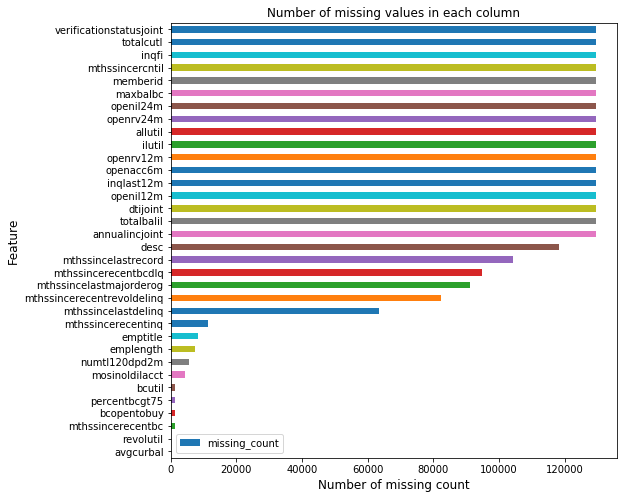

In [19]:
missing_df.plot(x='feature_name', y='missing_count', kind='barh', figsize=(8,8),fontsize = 10, logx=False )
plt.title("Number of missing values in each column", fontsize = 12)
plt.xlabel("Number of missing count",fontsize=12)
plt.ylabel("Feature",fontsize=12)
plt.show()

### Find all_null_feature, num_feature, ob_feature

In [20]:
# find all_null features, num_feature and object feature
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in df_2014.columns.values.tolist():
    if df_2014[col].isnull().sum() == df_2014.shape[0]:
        all_null_feature.append(col)
    else:
        if df_2014[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)
    

In [21]:
print ("number of numeric features: " + str(len(num_feature)))
print ("number of object features: " + str(len(ob_feature)))
print ("number of all_null_features: "+ str(len(all_null_feature)))

number of numeric features: 58
number of object features: 19
number of all_null_features: 17


In [22]:
all_null_feature

['inqfi',
 'mthssincercntil',
 'memberid',
 'maxbalbc',
 'openil24m',
 'openrv24m',
 'openrv12m',
 'allutil',
 'ilutil',
 'totalcutl',
 'totalbalil',
 'openil12m',
 'dtijoint',
 'annualincjoint',
 'openacc6m',
 'inqlast12m',
 'verificationstatusjoint']

In [23]:
ob_feature

['id',
 'revolutil',
 'grade',
 'initialliststatus',
 'applicationtype',
 'subgrade',
 'desc',
 'homeownership',
 'purpose',
 'term',
 'emplength',
 'emptitle',
 'earliestcrline',
 'intrate',
 'addrstate',
 'zipcode',
 'verificationstatus',
 'issued',
 'loanstatus']

In [24]:
num_feature

['numtl120dpd2m',
 'totalbalexmort',
 'accopenpast24mths',
 'avgcurbal',
 'mosinoldrevtlop',
 'openacc',
 'numrevtlbalgt0',
 'inqlast6mths',
 'totalilhighcreditlimit',
 'mortacc',
 'mthssincelastrecord',
 'tothicredlim',
 'mthssincerecentbc',
 'numtl90gdpd24m',
 'numiltl',
 'totalrevhilim',
 'mthssincerecentbcdlq',
 'ficorangelow',
 'mthssincerecentrevoldelinq',
 'numbcsats',
 'numsats',
 'bcopentobuy',
 'delinqamnt',
 'percentbcgt75',
 'taxliens',
 'installment',
 'ficorangehigh',
 'mosinoldilacct',
 'numactvrevtl',
 'numtloppast12m',
 'numactvbctl',
 'chargeoffwithin12mths',
 'numbctl',
 'pubrec',
 'bcutil',
 'pcttlnvrdlq',
 'mthssincelastmajorderog',
 'accnowdelinq',
 'totcollamt',
 'mthssincerecentinq',
 'mosinrcntrevtlop',
 'totalbclimit',
 'pubrecbankruptcies',
 'numoprevtl',
 'revolbal',
 'annualinc',
 'totalacc',
 'mthssincelastdelinq',
 'delinq2yrs',
 'collections12mthsexmed',
 'numtl30dpd',
 'mosinrcnttl',
 'totcurbal',
 'numrevaccts',
 'dti',
 'fundedamnt',
 'loanamnt',
 'nu

In [25]:
len(num_feature)

58

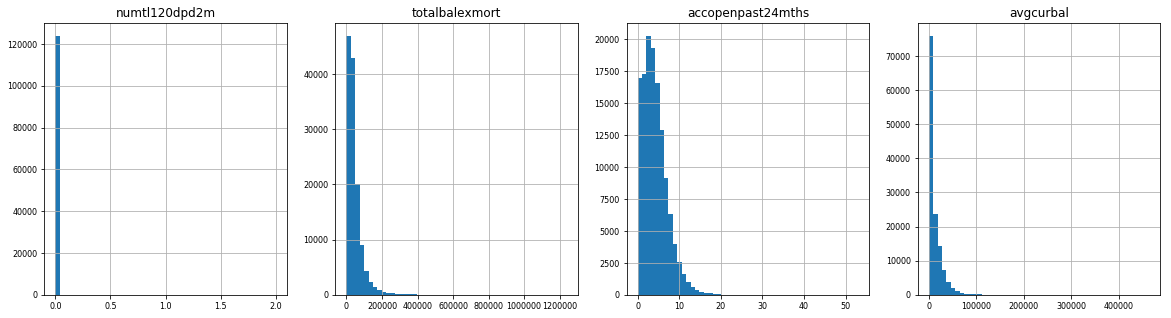

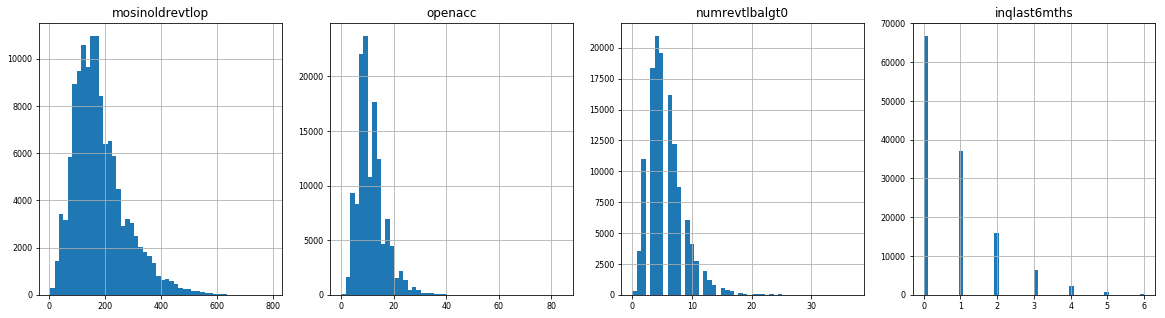

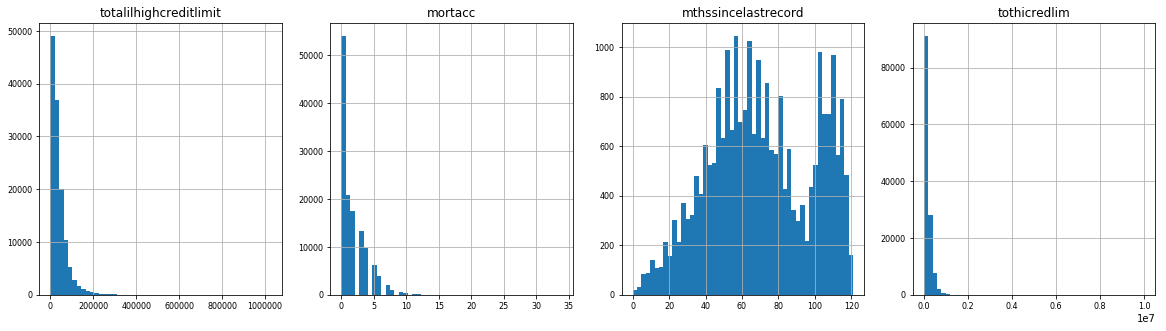

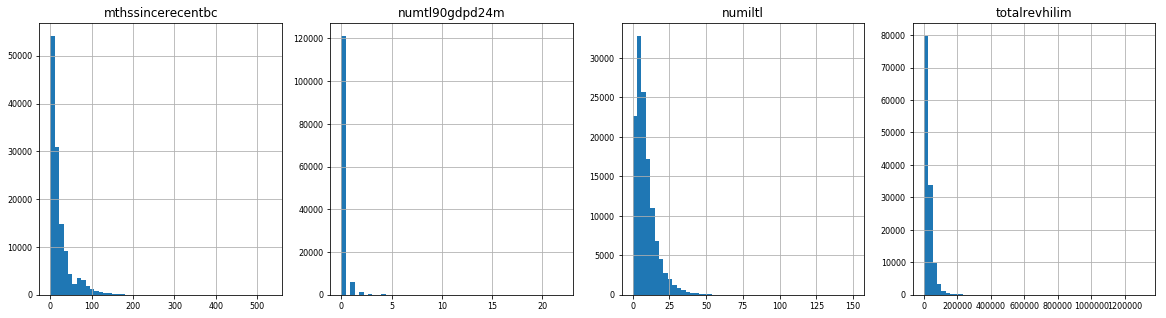

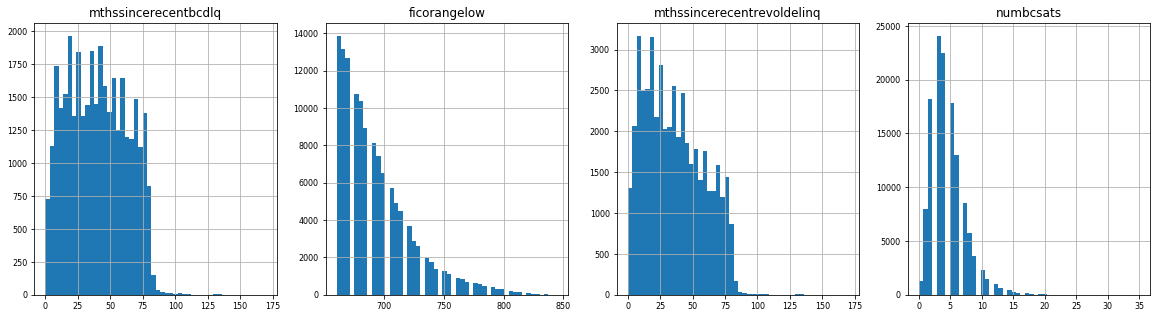

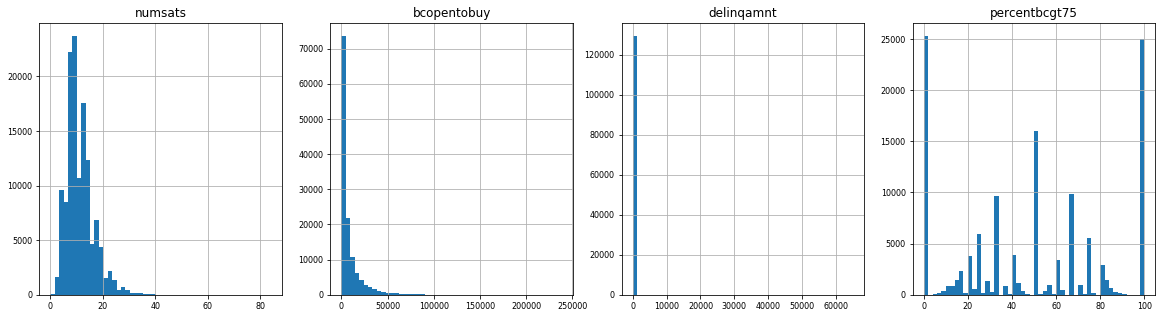

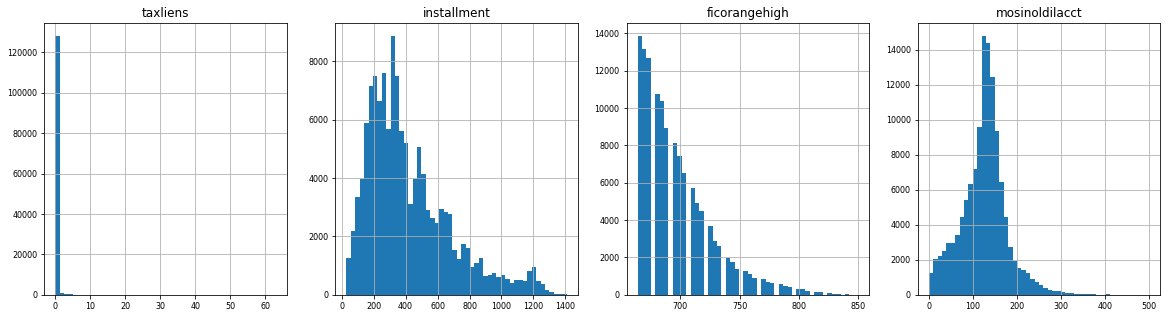

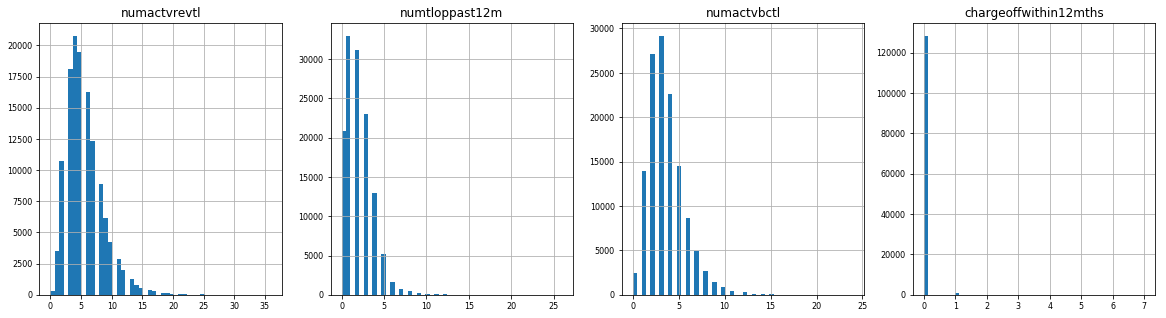

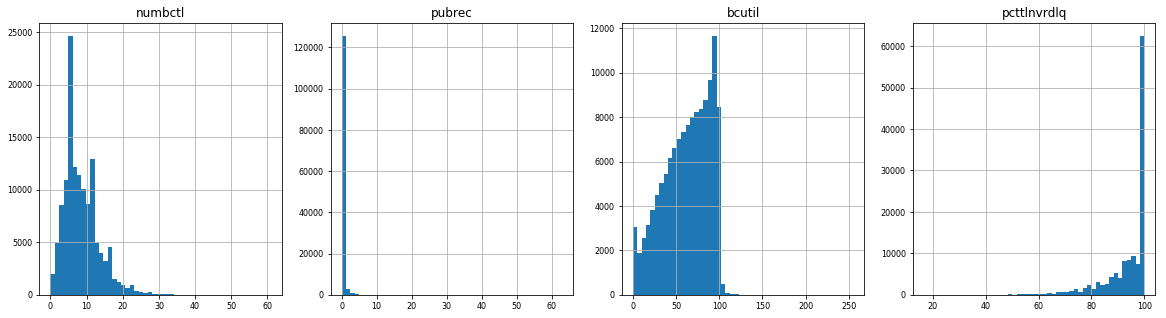

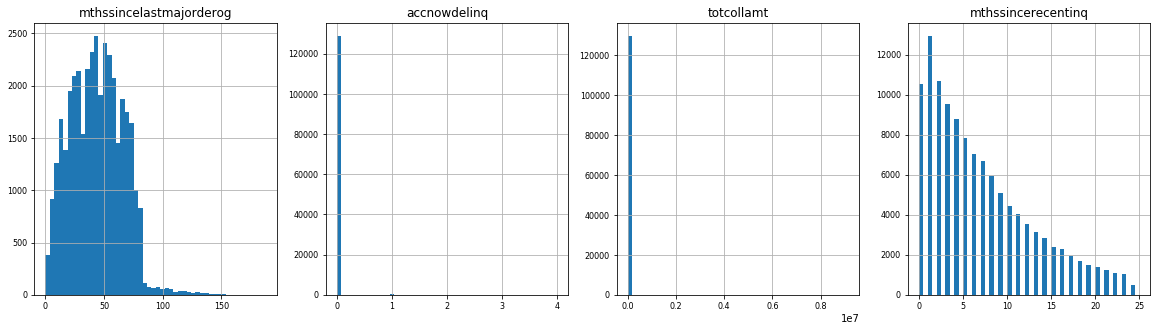

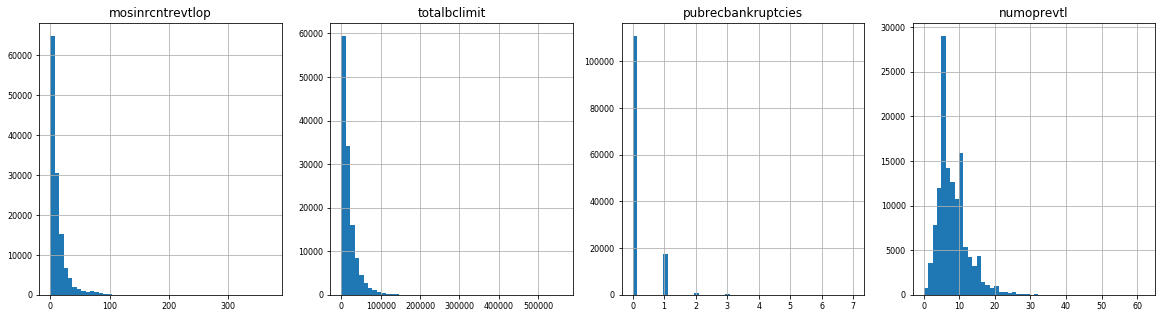

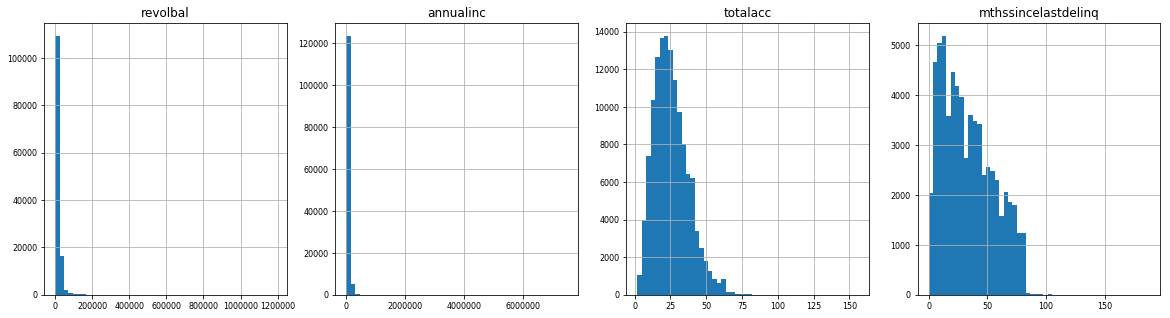

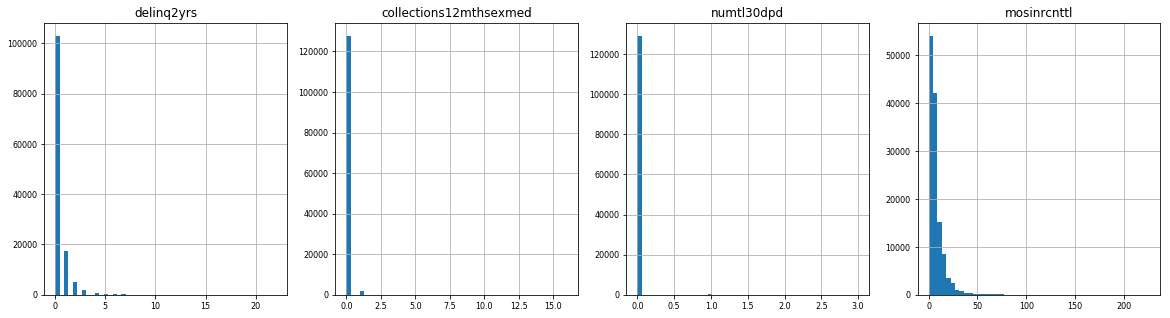

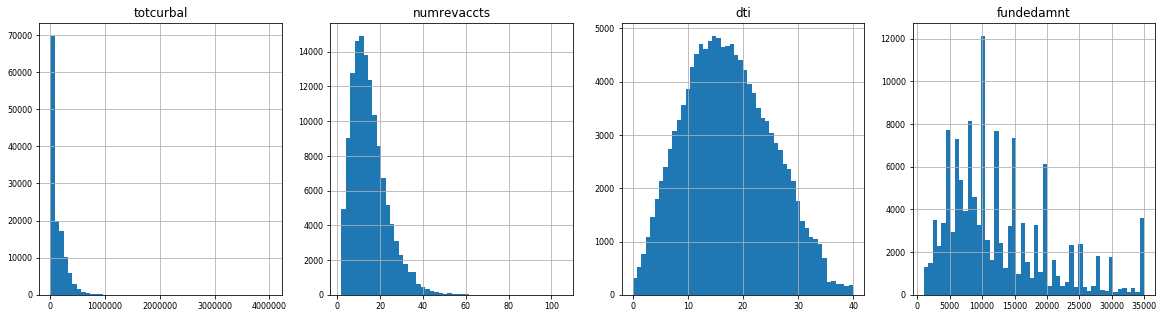

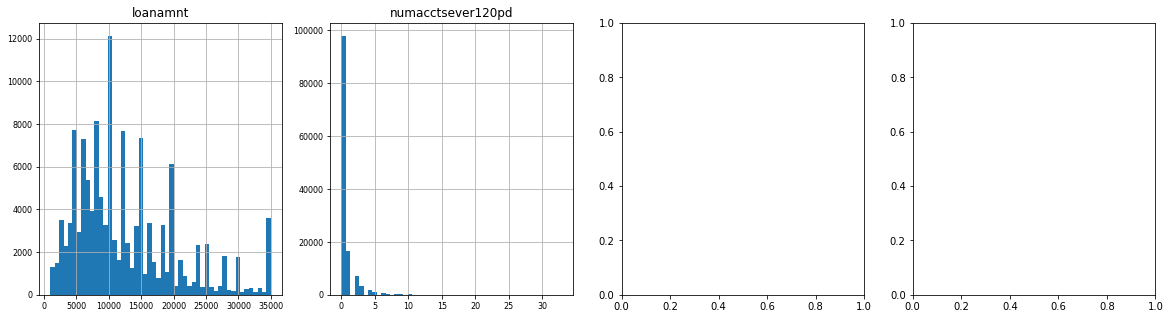

In [34]:
# ncol = 4  
# nrow = 15
# for i in range(nrow):
#     fg,ax = plt.subplots(nrows=1,ncols=ncol,figsize=(20, 5))
#     for j in range(ncol):
#         location = i * ncol + j 
#         if location < len(num_feature):
#             col = num_feature[location]
#             #sns.countplot(x = col, data = df_2014, ax = ax[j])
#             df_2014[col].hist(bins=50, xlabelsize=8, ylabelsize=8, ax = ax[j])
#             ax[j].set_title(col)
# plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


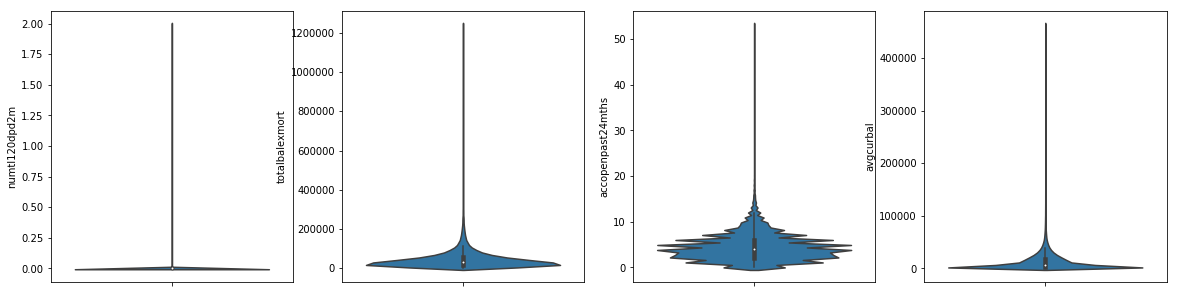

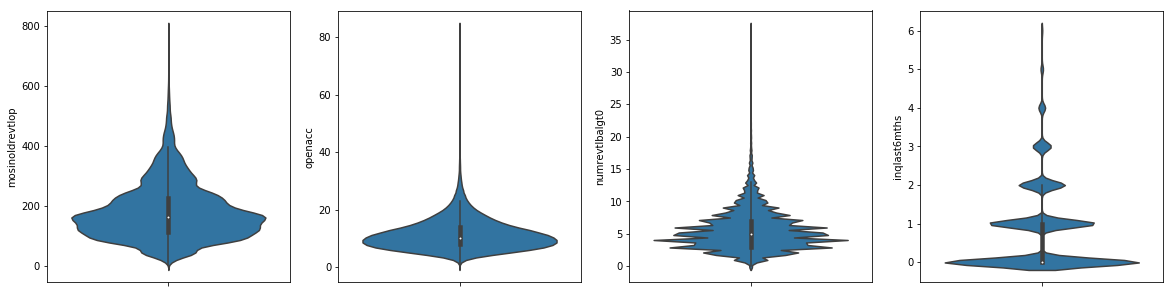

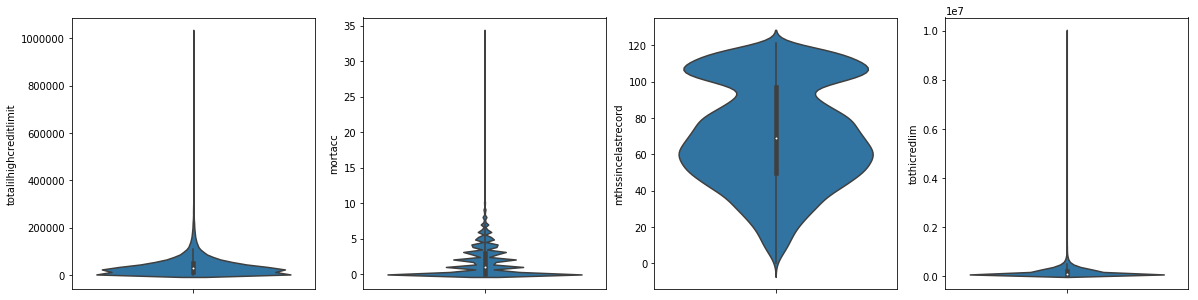

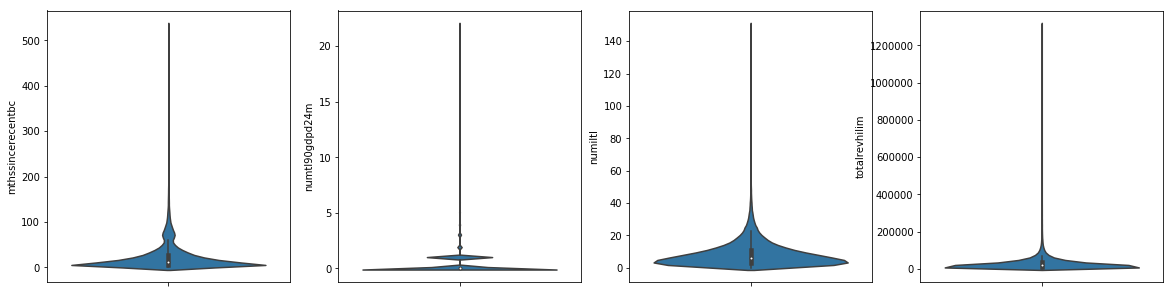

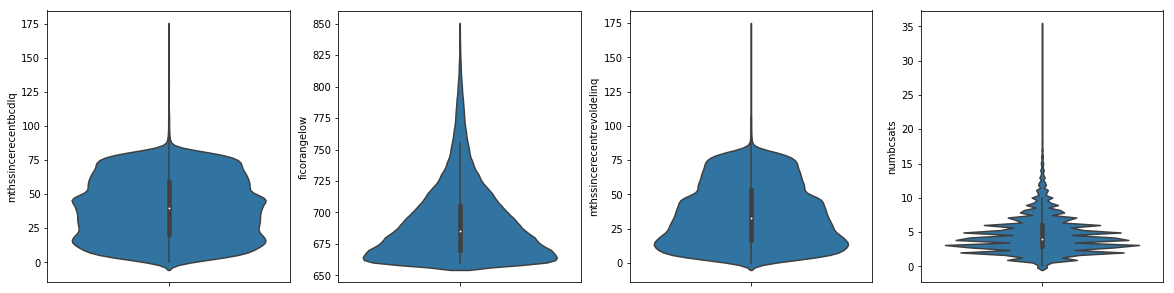

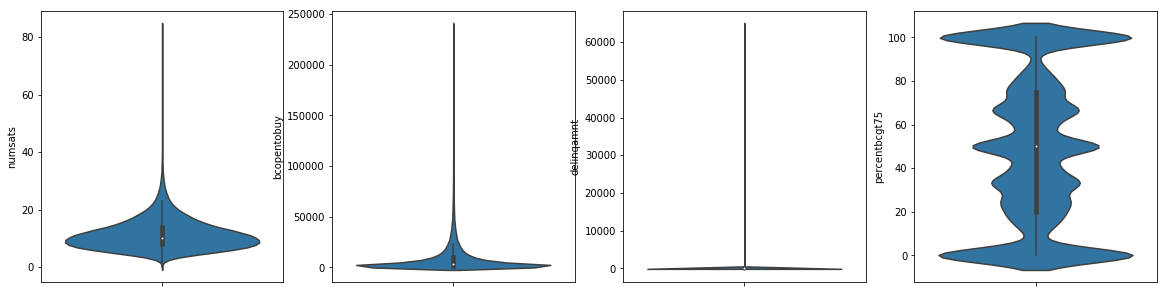

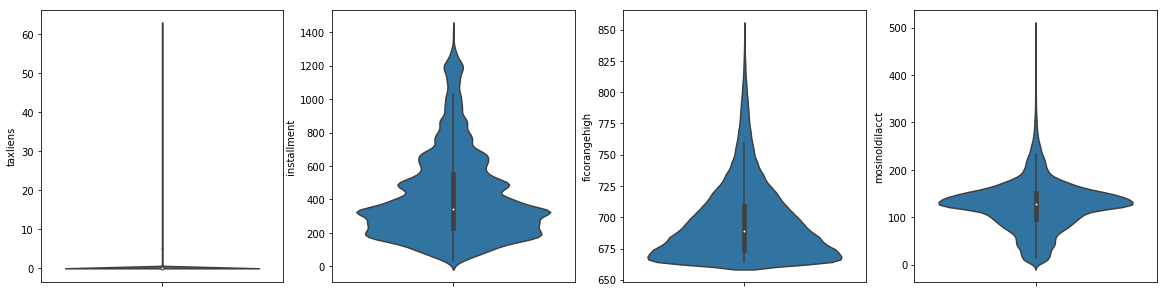

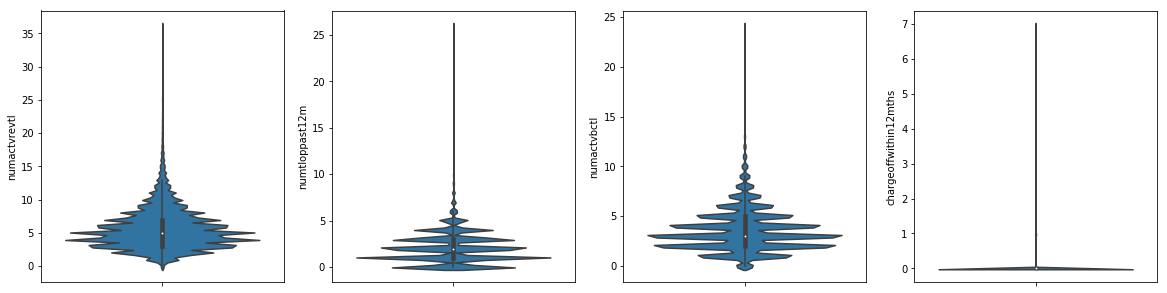

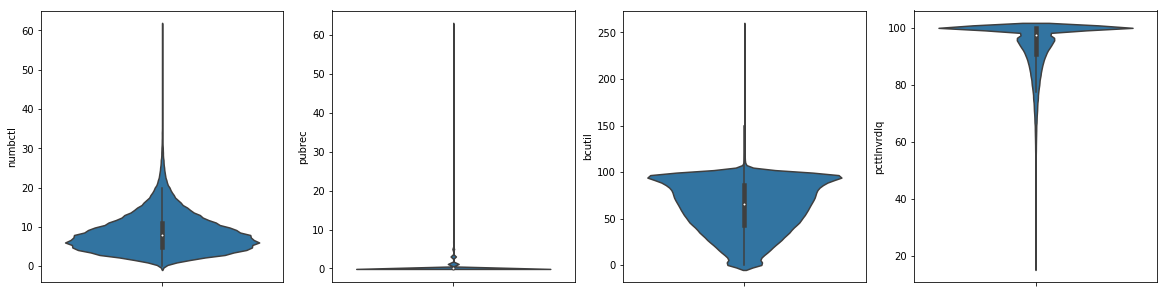

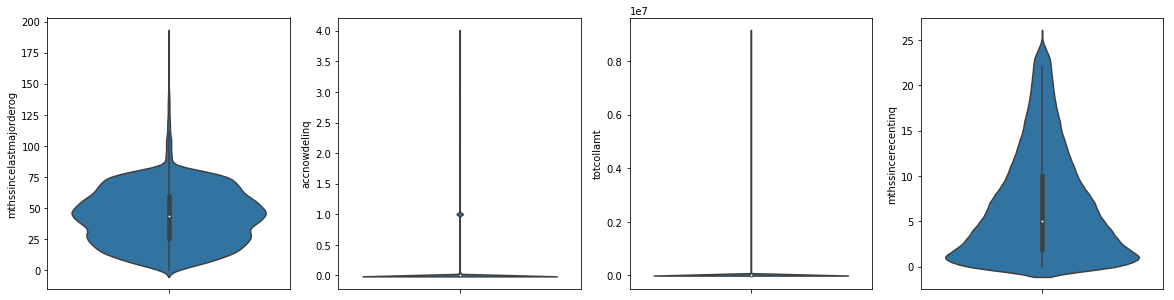

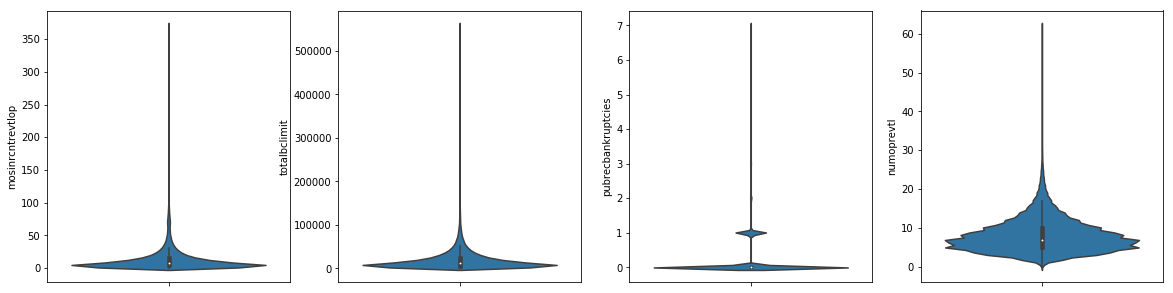

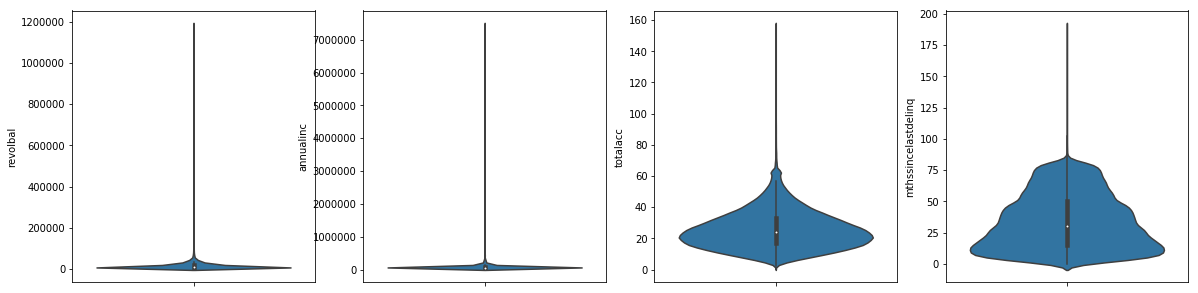

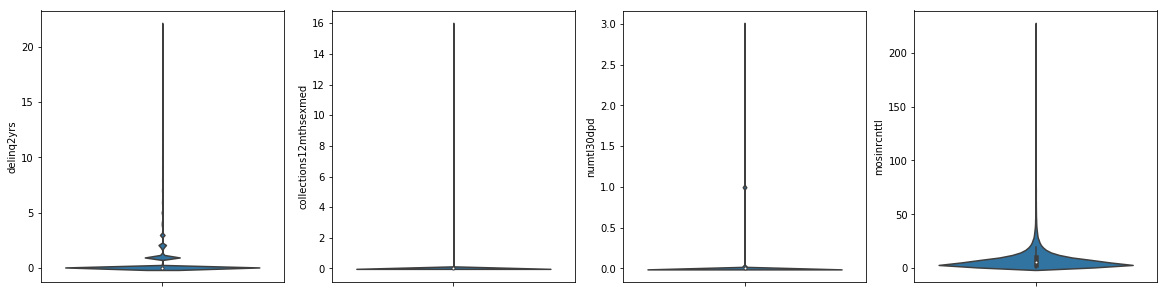

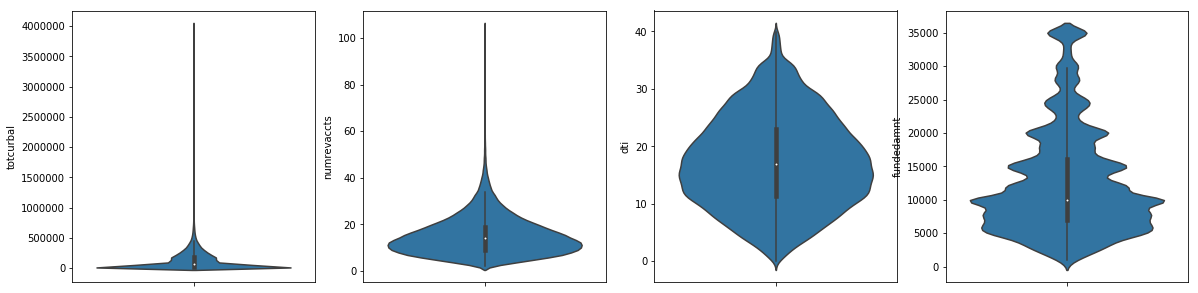

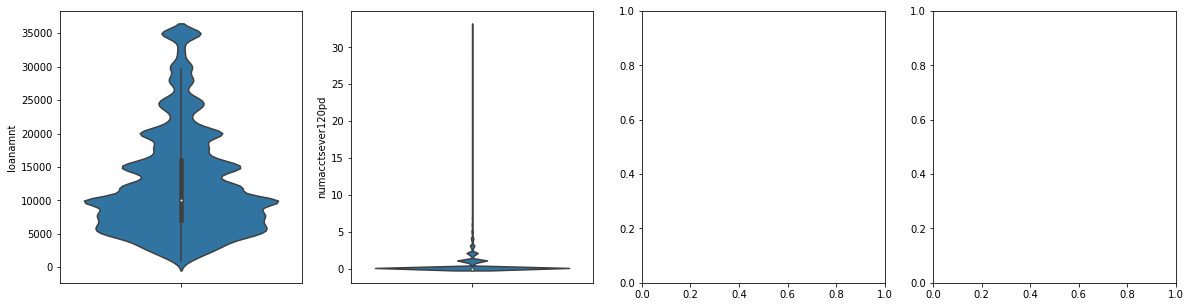

In [35]:
ncol = 4  
nrow = 15
for i in range(nrow):
    fg,ax = plt.subplots(nrows=1,ncols=ncol,figsize=(20, 5))
    for j in range(ncol):
        location = i * ncol + j 
        if location < len(num_feature):
            col = num_feature[location]
            #sns.countplot(x = col, data = df_2014, ax = ax[j])
            sns.violinplot(y=col, data=df_2014, ax=ax[j])
plt.show()

Number of unique values per object feature

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


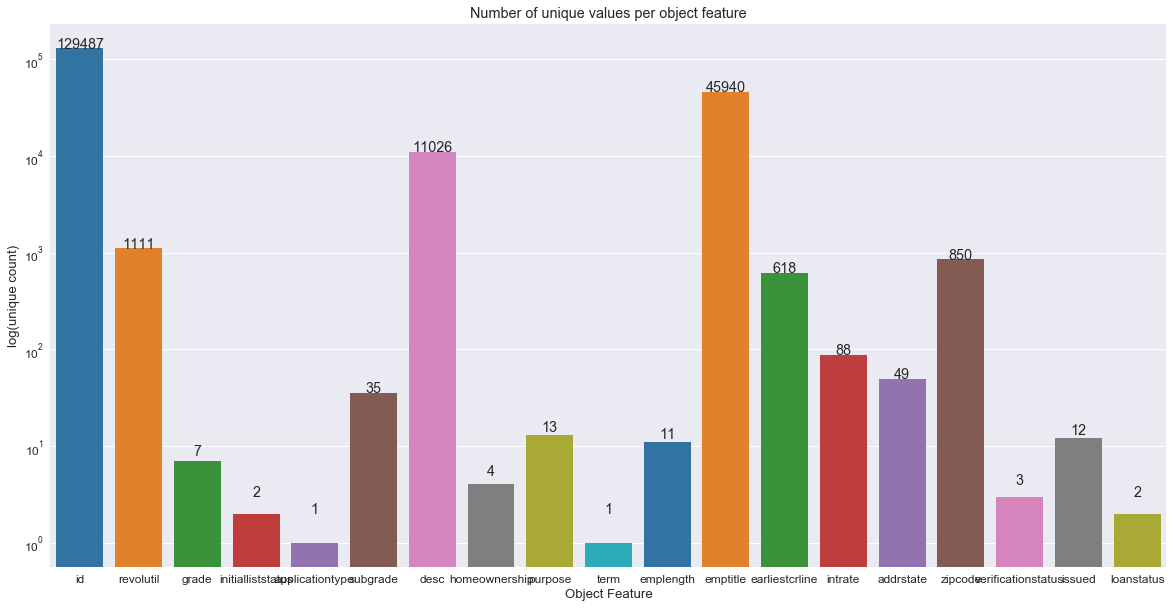

In [25]:
pal = sns.color_palette()
plt.figure(figsize=(20, 10))
cols = ob_feature
uniques = [df_2014[col].nunique() for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Object Feature', ylabel='log(unique count)', title='Number of unique values per object feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            uniq,
            ha="center") 

In [26]:
ob_feature_to_remove = ['id','revolutil','desc','applicationtype','term', 'emptitle','earliestcrline','zipcode']
ob_feature_1 = list(set(ob_feature).difference(set(ob_feature_to_remove)))

In [27]:
ob_feature_1

['subgrade',
 'purpose',
 'loanstatus',
 'issued',
 'emplength',
 'homeownership',
 'initialliststatus',
 'addrstate',
 'grade',
 'intrate',
 'verificationstatus']

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


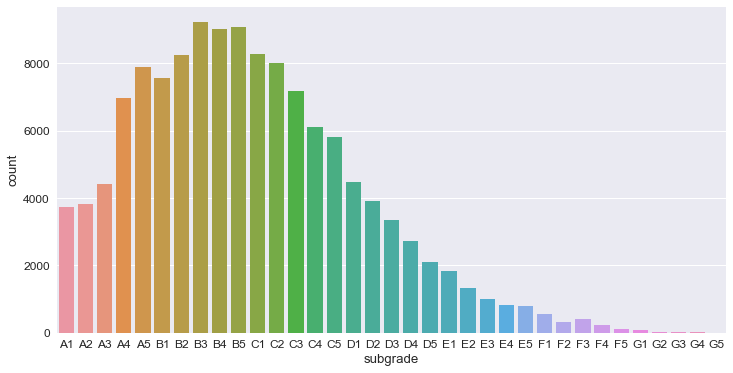

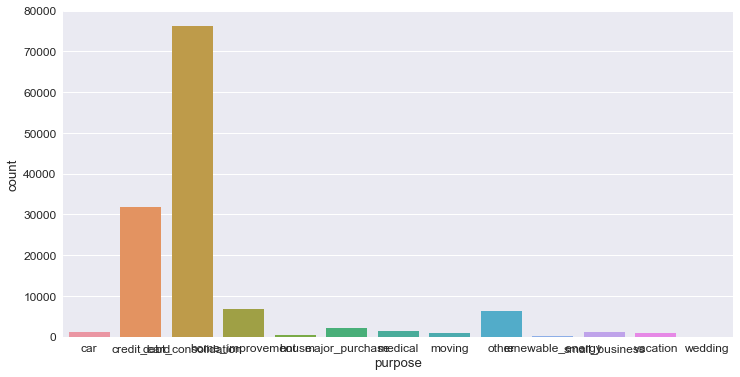

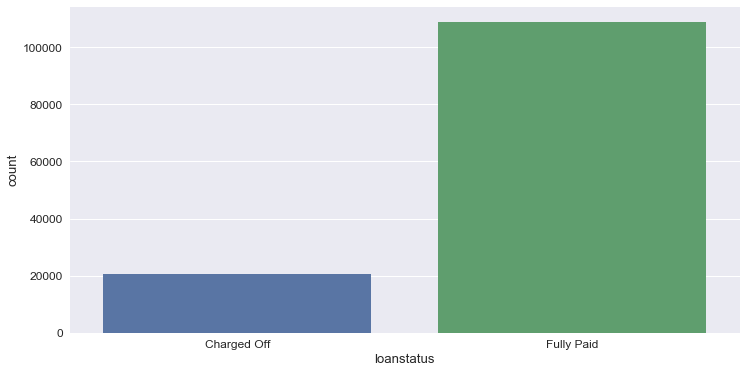

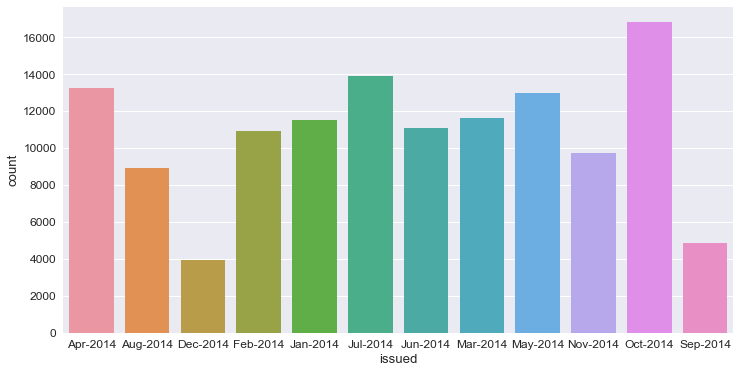

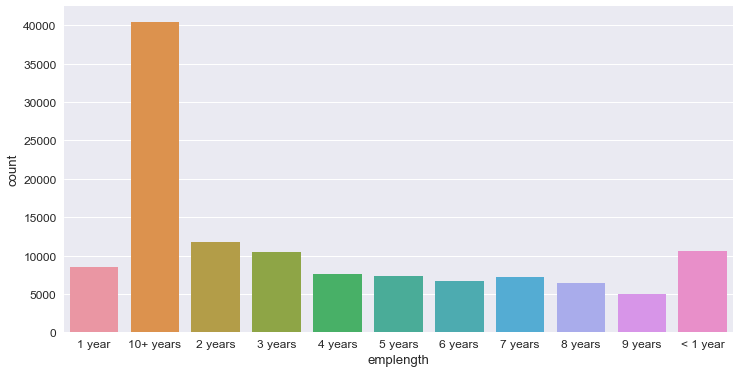

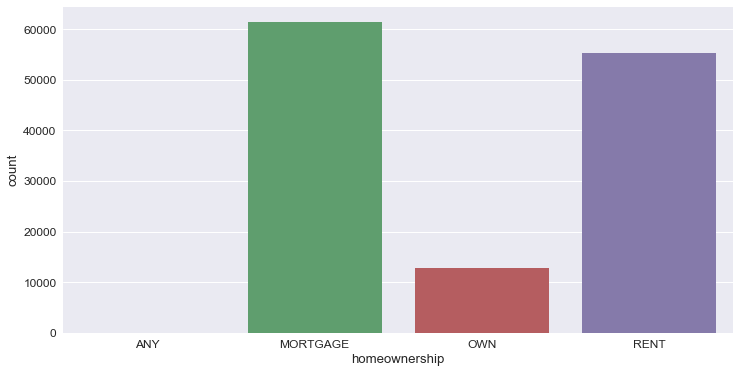

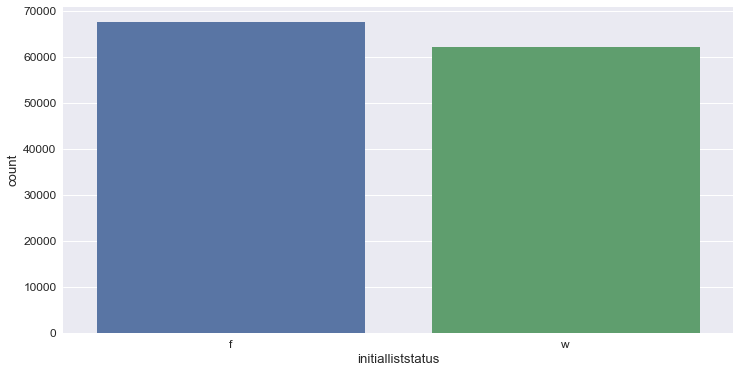

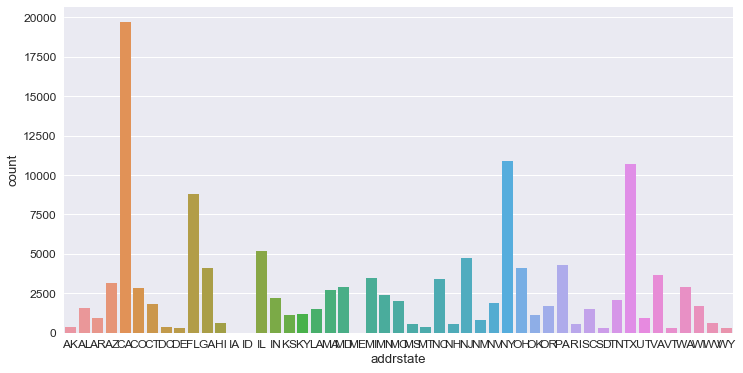

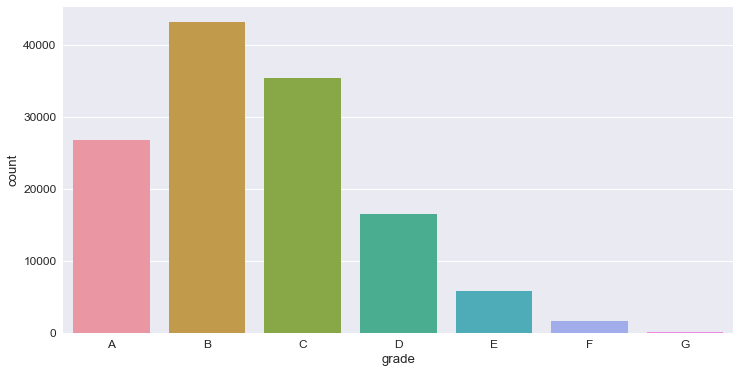

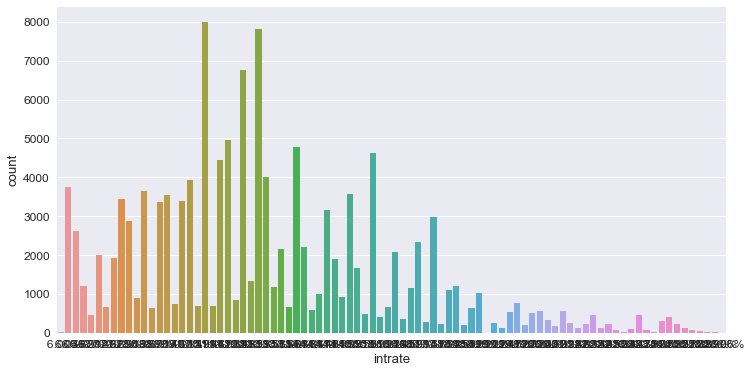

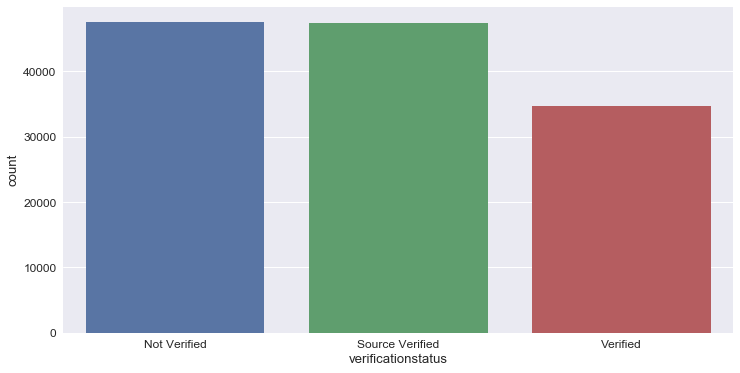

In [28]:
#Plot count plot for all object features in ob_feature
for col in ob_feature_1:
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 6))
    order = df_2014[col].value_counts().index.sort_values()
    sns.countplot(x=col, order = order, data=df_2014)

#### Generate the correlation matrix for selected numerical features, and plot it by using heatmap . 

In [29]:
df_processed = pd.read_csv('Data/loan_2014_processed.csv') 

In [30]:
selected_feature = ['avgcurbal',
 'mosinoldrevtlop',
 'totalilhighcreditlimit',
 'tothicredlim',
 'mthssincerecentbc',
 'bcopentobuy',
 'installment',
 'bcutil',
 'mthssincerecentinq',
 'totalbclimit',
 'revolbal',
 'annualinc',
 'dti',
 'earliestcrlinemonth',
 'emplength',
 'intrate',
 'revolutil',
 'grade',
 'subgrade',
 'zipcode',
 'zipcodefreq',
 'emptitlefreq',
 'addrstatefreq']

In [31]:
len(selected_feature)

23

In [27]:
def plot_corr(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(16, 13))
    sns.heatmap(corr, cmap='RdBu_r')
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('correlation heatmap for selected feature')
plot_corr(df_processed[selected_feature])

NameError: name 'df_processed' is not defined

1. Low correlation means there's no linear relationship, it doesn't mean there is no relationship.
2. Good feature subsets contain features highly correlated with the classification, yet uncorrelated to each other. 
3. multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

Text(0,0.5,'Count')

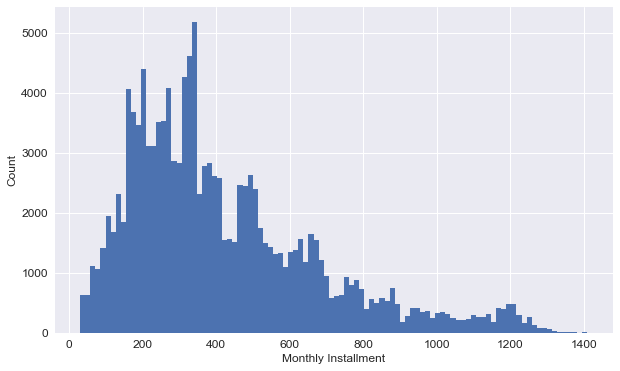

In [33]:
fig=plt.figure(figsize=(10,6))
df_processed.installment.hist(bins=100)
plt.xlabel("Monthly Installment",fontsize=12)
plt.ylabel("Count",fontsize=12)

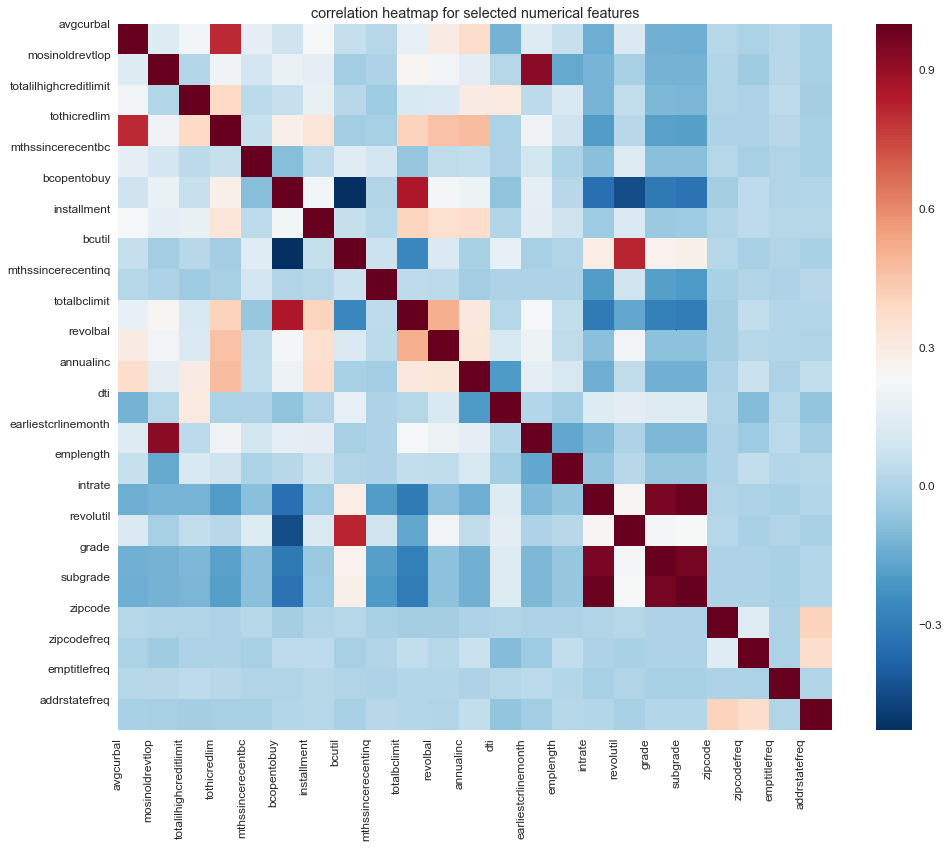

In [34]:
def plot_corr(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(16, 13))
    sns.heatmap(corr, cmap='RdBu_r')
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('correlation heatmap for selected numerical features')
plot_corr(df_processed[numerical_feature])

In [35]:

dummy_list = ["emplength", "verificationstatus", "delinq2yrs", 'homeownership', 
              "grade", "subgrade"]
n = len(dummy_list)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


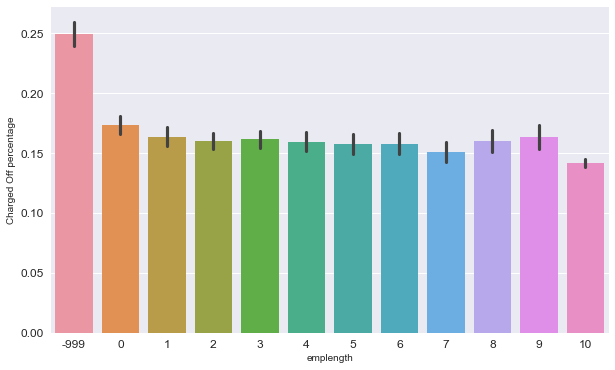

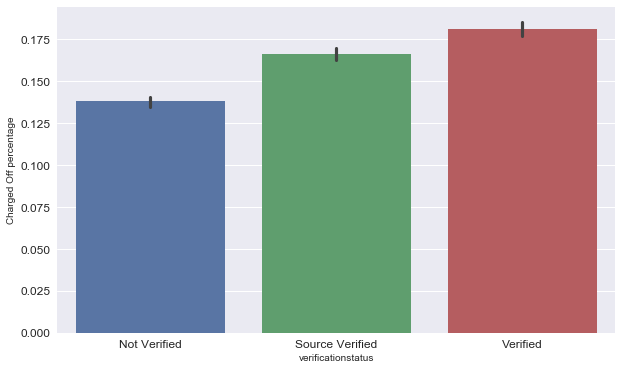

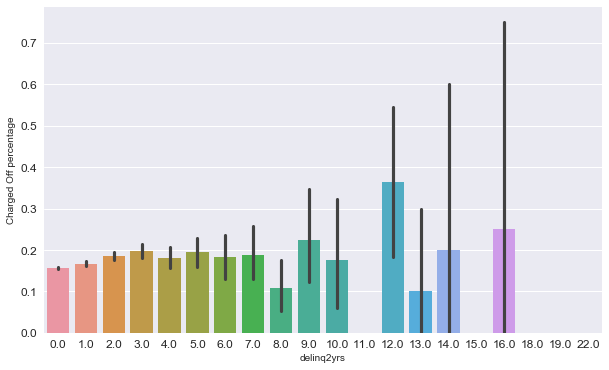

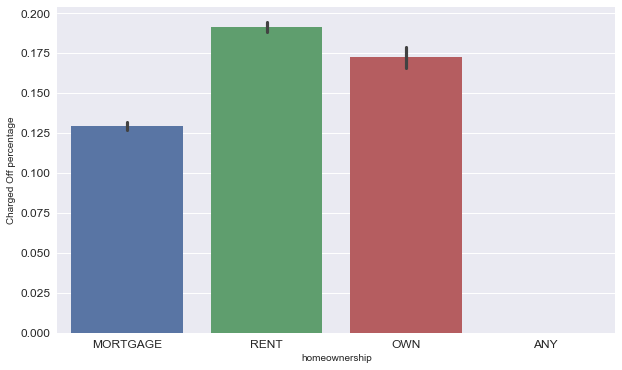

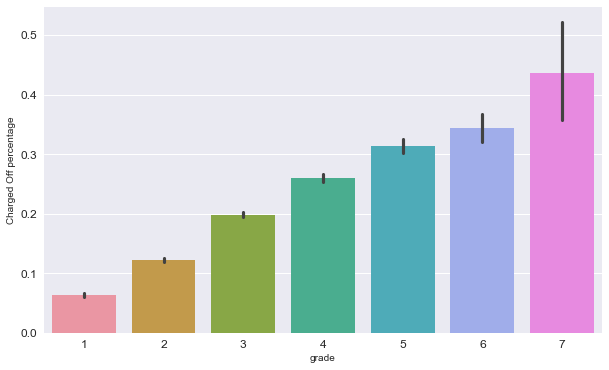

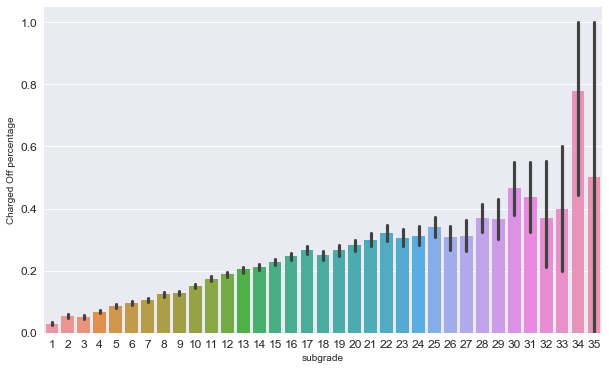

In [36]:
for col in dummy_list:
    fig=plt.figure(figsize=(10,6))
    sns.barplot(x=col, y='loanstatus', data=df_processed)
    plt.xlabel(str(col),fontsize=10)
    plt.ylabel("Charged Off percentage",fontsize=10)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


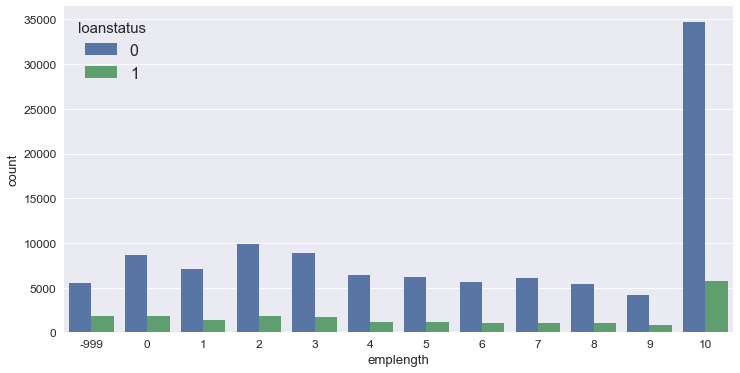

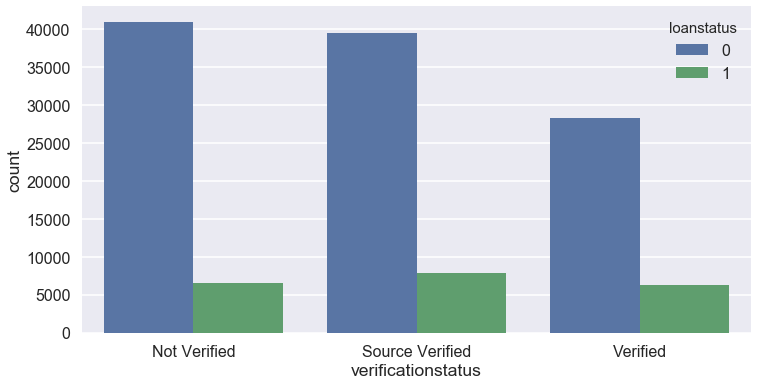

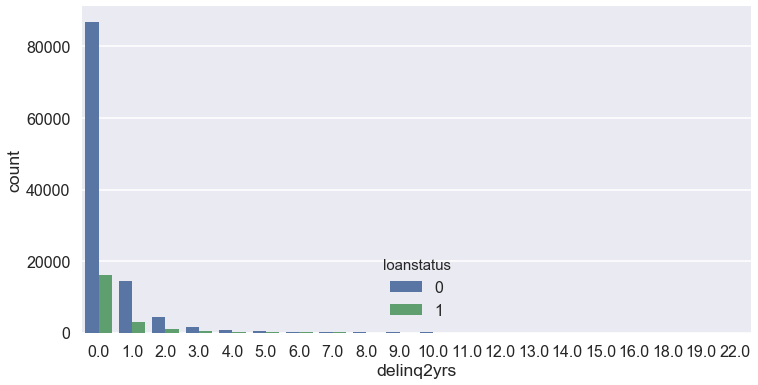

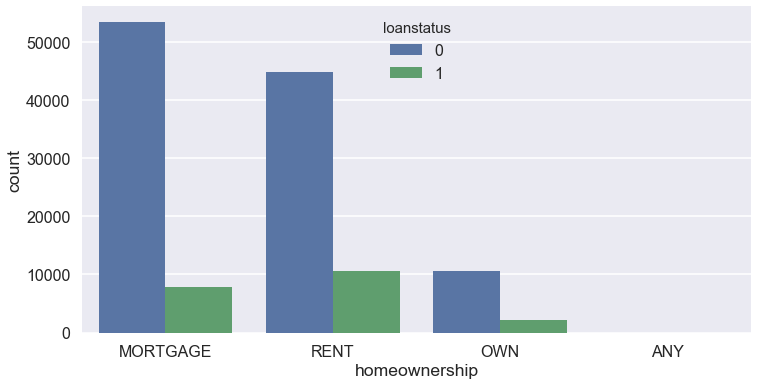

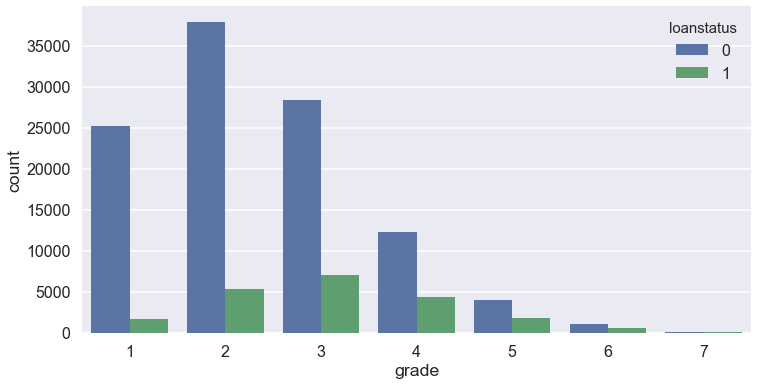

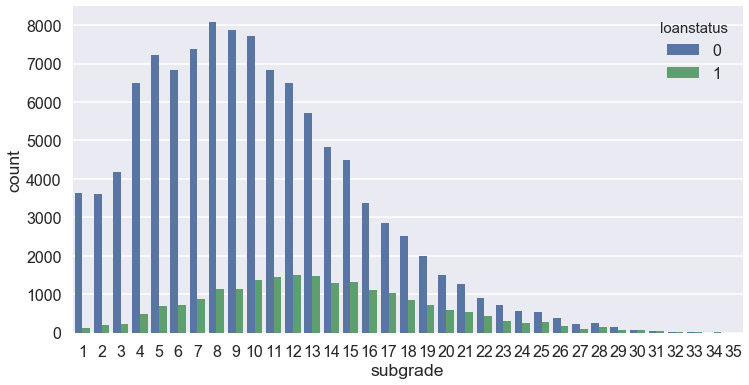

In [37]:
for col in dummy_list:
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 6))
    sns.set_context("poster")
    sns.countplot(x=col, hue='loanstatus', data=df_processed)


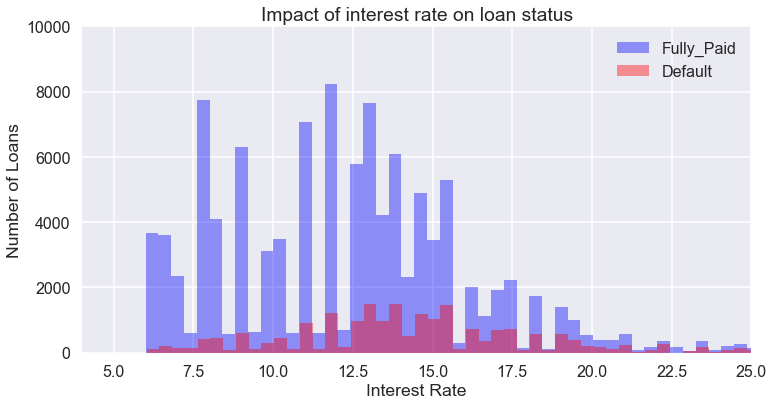

In [38]:
paid_data = df_processed.loc[(df_processed['loanstatus'] == 0)]
default_data = df_processed.loc[(df_processed['loanstatus'] == 1)]


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 6))

ax.hist(paid_data['intrate'], bins = 50, alpha = 0.4, label='Fully_Paid', color = 'blue', range = (paid_data['intrate'].min(),paid_data['intrate'].max()))
ax.hist(default_data['intrate'], bins = 50, alpha = 0.4, label='Default', color = 'red', range = (default_data['intrate'].min(),default_data['intrate'].max()))
plt.title('Impact of interest rate on loan status')
plt.legend(loc='upper right')
plt.xlabel('Interest Rate')
plt.axis([4, 25, 0, 10000])
plt.ylabel('Number of Loans')
plt.show()


In [39]:
def continuous_variable_plot(df, feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#12E8FA", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

In [40]:
selected_feature = ['avgcurbal',
 'mosinoldrevtlop',
 'totalilhighcreditlimit',
 'tothicredlim',
 'mthssincerecentbc',
 'bcopentobuy',
 'installment',
 'bcutil',
 'mthssincerecentinq',
 'totalbclimit',
 'revolbal',
 'annualinc',
 'dti',
 'earliestcrlinemonth',
 'intrate',
 'revolutil']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


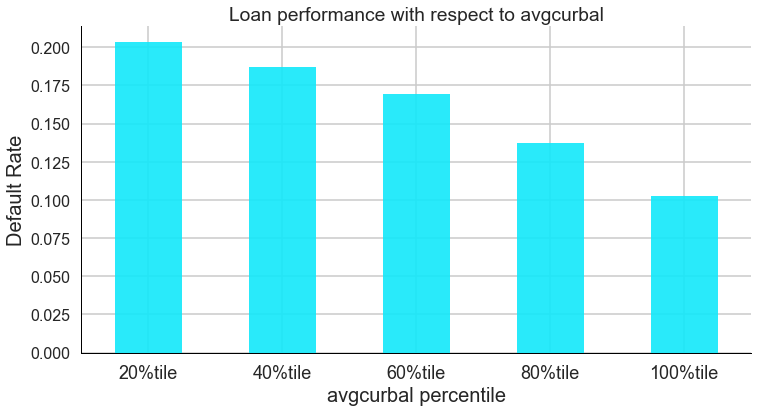

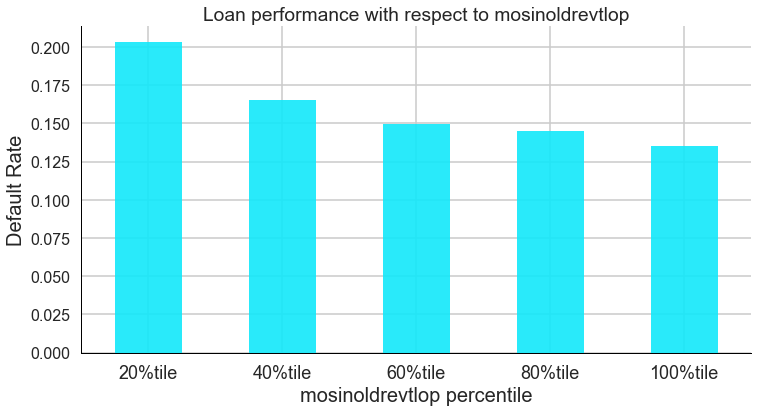

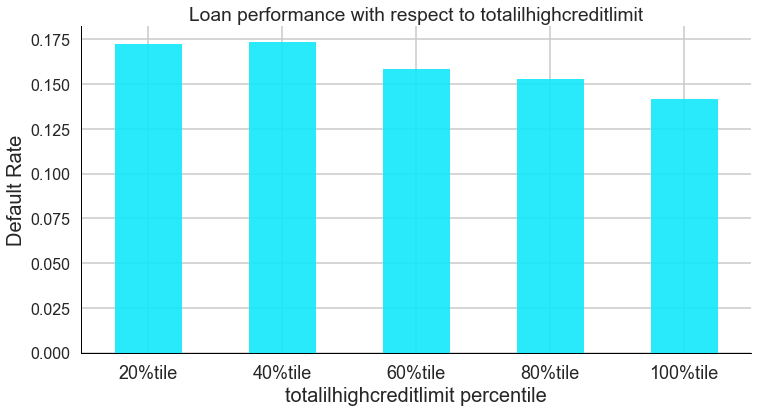

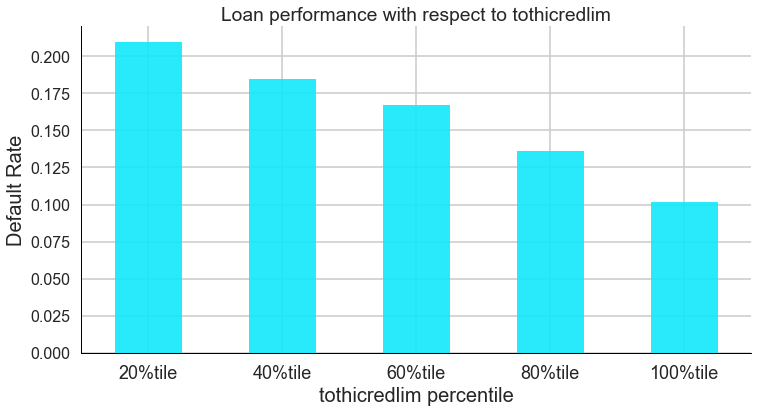

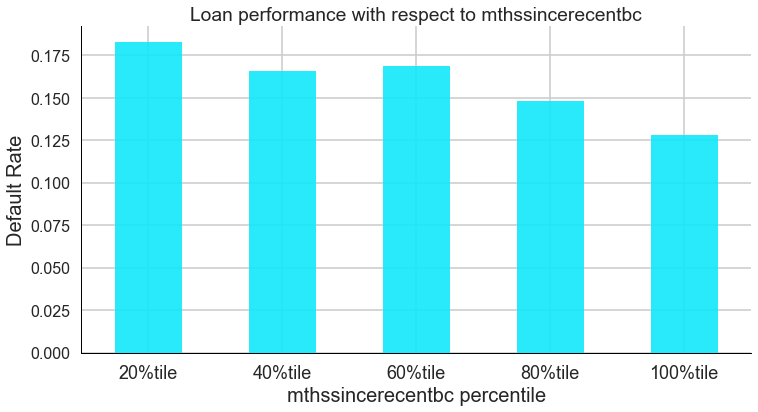

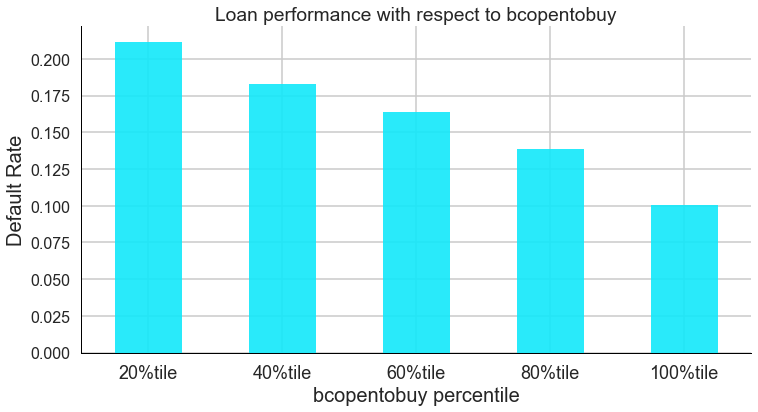

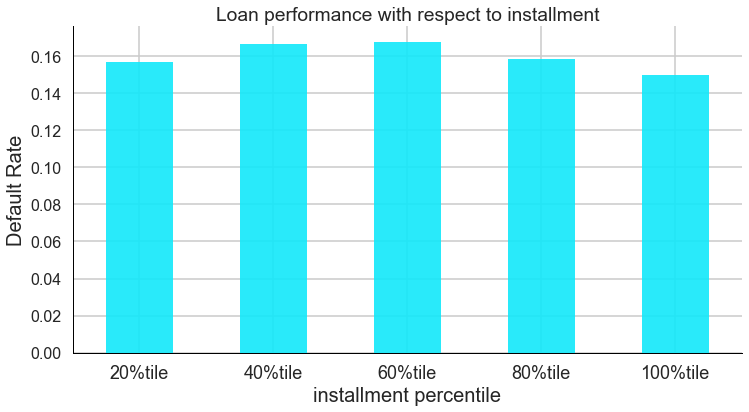

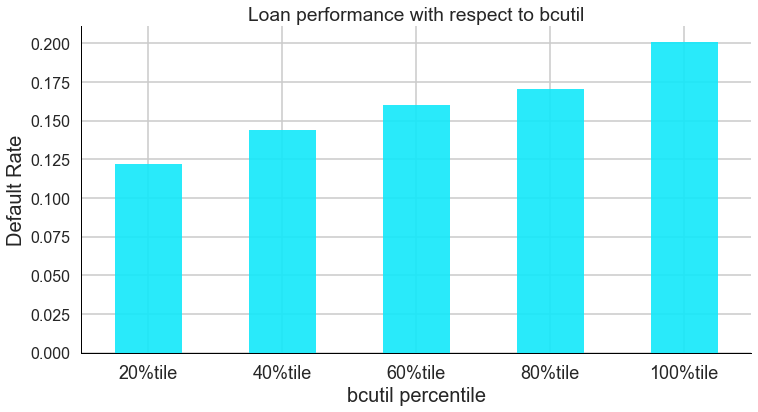

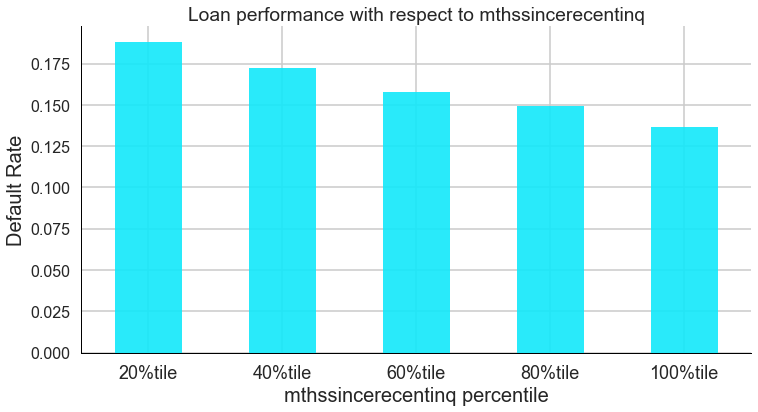

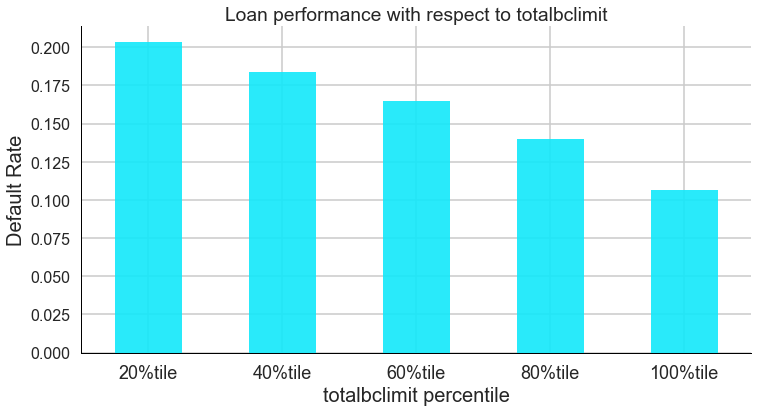

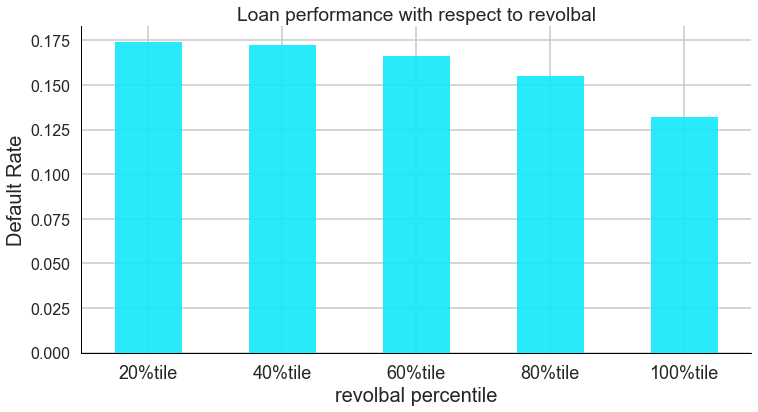

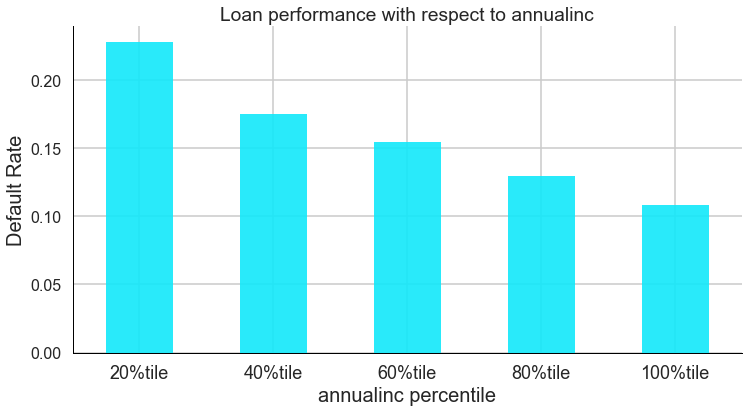

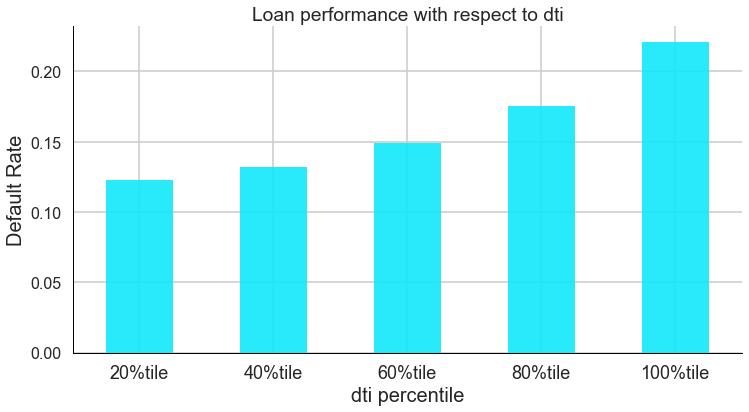

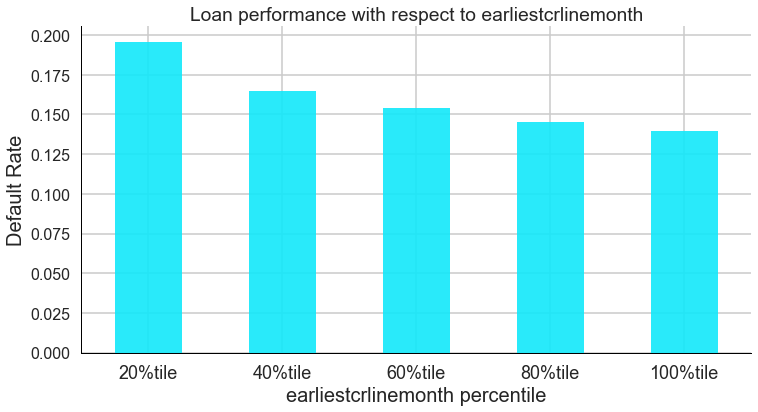

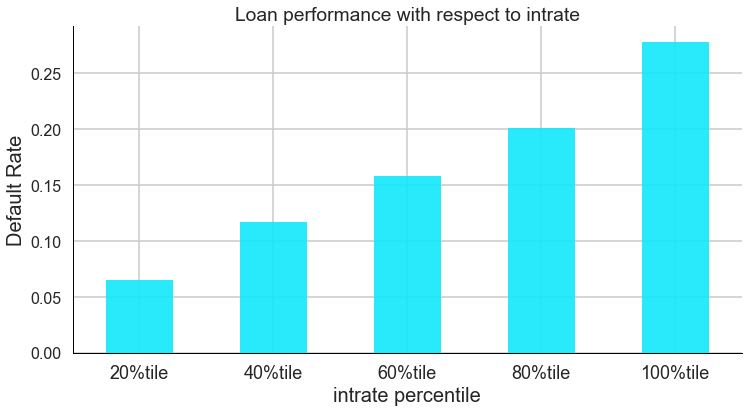

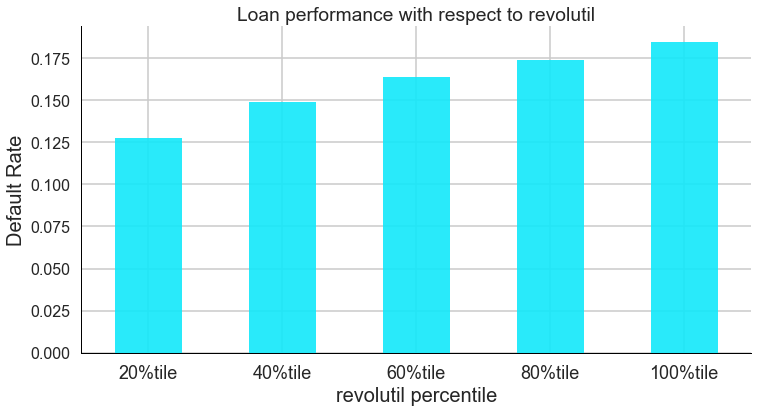

In [41]:
for col in selected_feature:
    continuous_variable_plot(df_processed, col)